В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на репозиторій:  
https://github.com/vasyllarin/python_for_ds_tasks/blob/main/process_bank_churn.py

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/module_2_3')

In [3]:
import process_bank_churn
from process_bank_churn import preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [4]:
import pandas as pd
raw_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/train.csv")
processed = preprocess_data(raw_df)
X_train = processed['X_train']
train_targets = processed['train_targets']
X_val = processed['X_val']
val_targets = processed['val_targets']
input_cols = processed['input_cols']
scaler = processed['scaler']
encoder = processed['encoder']

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

AUROC for Training: 1.00


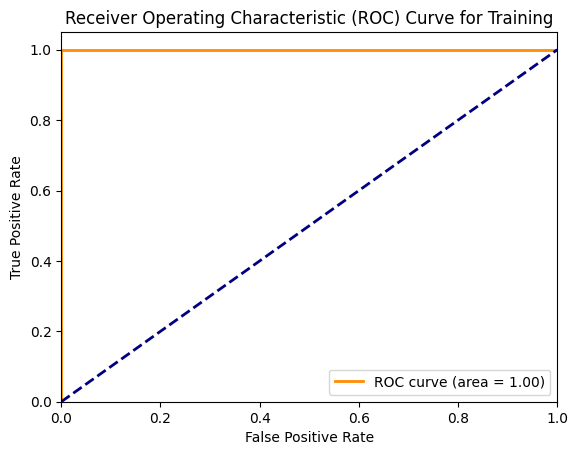

AUROC for Validation: 0.77


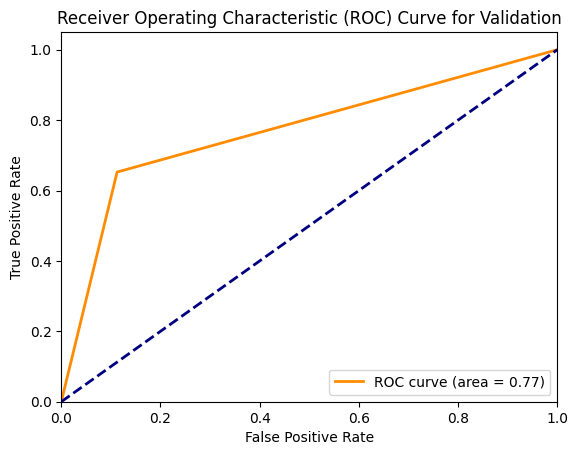

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

 Оскільки AUROC для тестового датсету = 1, а для валідаційного 0.77, це свідчить про overfitting - модель добре працює на тренувальних даних, але погано працює з новими даними

In [7]:
model.tree_.max_depth

26

In [8]:
from sklearn.tree import plot_tree, export_text
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.38
|   |   |   |--- truncated branch of depth 24
|   |   |--- Age >  0.38
|   |   |   |--- truncated branch of depth 18
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 17
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- class: 1.0



Найвпливовіші ознаки: Age, NumOfProducts, IsActiveMember

In [9]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

AUROC for Training: 0.92


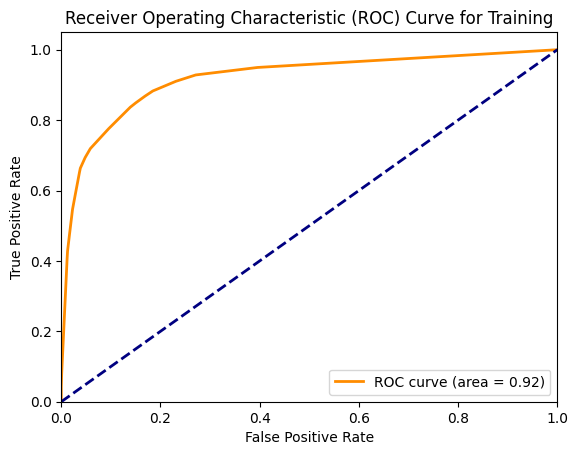

AUROC for Validation: 0.92


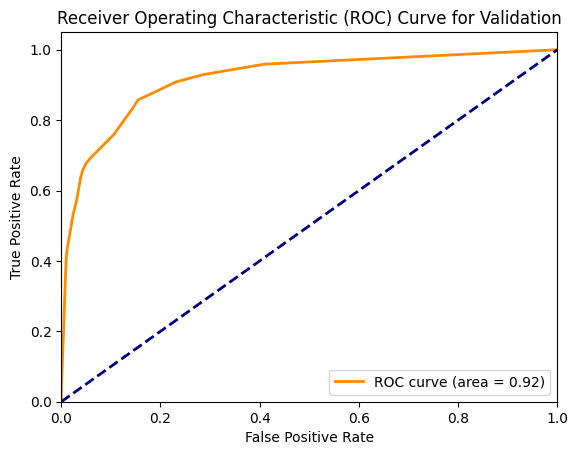

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=20, max_leaf_nodes=20)
model.fit(X_train, train_targets)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def max_depth_auroc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [11]:
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(train_targets, y_train_proba, pos_label=1)
    train_auroc = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(val_targets, y_val_proba, pos_label=1)
    val_auroc = auc(fpr_val, tpr_val)

    return {'Max Depth': md, 'Train AUROC': train_auroc, 'Validation AUROC': val_auroc}

errors_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 21)])

errors_df.style.background_gradient(subset='Validation AUROC', cmap='Blues')


,Max Depth,Train AUROC,Validation AUROC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.921111
6,7,0.941535,0.914449
7,8,0.949541,0.903147
8,9,0.959079,0.884709
9,10,0.969765,0.848436


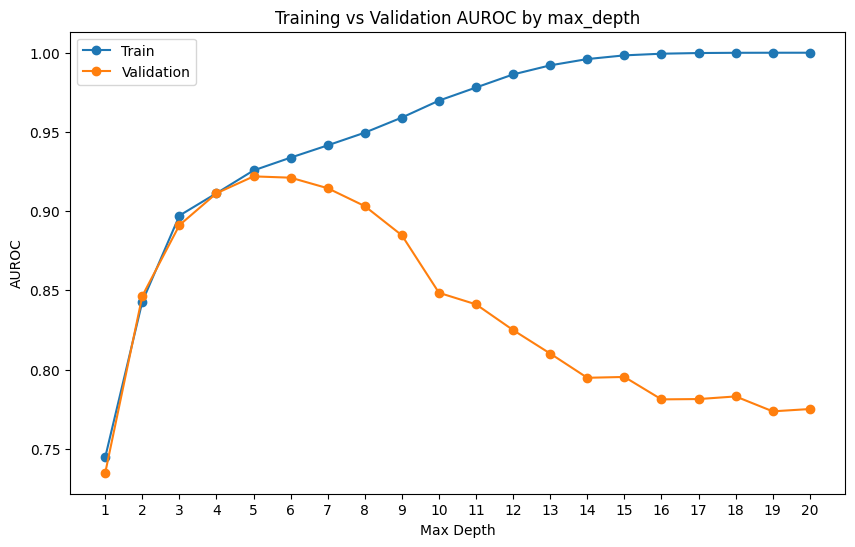

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(errors_df['Max Depth'], errors_df['Train AUROC'], marker='o')
plt.plot(errors_df['Max Depth'], errors_df['Validation AUROC'], marker='o')
plt.title('Training vs Validation AUROC by max_depth')
plt.xticks(range(1, 21))
plt.xlabel('Max Depth')
plt.ylabel('AUROC')
plt.legend(['Train', 'Validation'])
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [13]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=20)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42)

In [14]:
test_raw_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/test.csv")
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


## Примітка

Не вдавалося імпортувати функцію preprocess_new_data, постійно виникала помилка, тому щоб завершити задачу, просто прописав функцію окремо у цьому ноутбуці

In [30]:
def preprocess_test_data(test_raw_df, scaler, encoder):
  import numpy as np
  import pandas as pd

  test_raw_df = test_raw_df.drop(columns = ['CustomerId', 'Surname'])

  input_cols = list(test_raw_df.drop(columns = ['id']).columns)

  test_inputs = test_raw_df[input_cols].copy()

  numeric_cols = test_inputs.select_dtypes(include=np.number).columns.tolist()
  categorical_cols = test_inputs.select_dtypes('object').columns.tolist()

  test_inputs['Balance'] = np.log1p(test_inputs['Balance'])

  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

  encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

  X_test_raw = test_inputs.drop(columns=['Geography', 'Gender'])
  X_test = pd.concat([X_test_raw, test_raw_df['id']], axis=1)

  return X_test

In [31]:
test_df = preprocess_test_data(test_raw_df, scaler, encoder)
test_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,id
0,0.365155,0.214286,0.2,0.970456,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,15000
1,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,15001
2,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,15002
3,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,15003
4,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,15004


In [33]:
test_df['Exited'] = model.predict(test_df.drop(columns=['id']))
test_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,id,Exited
0,0.365155,0.214286,0.2,0.970456,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,15000,0.0
1,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,15001,0.0
2,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,15002,0.0
3,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,15003,1.0
4,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,15004,0.0


In [35]:
submission = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/sample_submission.csv")
submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [36]:
submission['Exited'] = submission['id'].map(test_df.set_index('id')['Exited'])
submission.reset_index(drop=True, inplace=True)
submission.head()

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,1.0
4,15004,0.0


In [38]:
submission.to_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/submission.csv", index=False)